In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.signal import find_peaks

# Discrete Fourier Transform

## Types of Transform

|  Signal  |  Type of Transform  |
| ---- | ---- |
|  Continuous and aperiodic  |  Fourier Transform  |
|  Continuous and periodic  |  Fourier Series  |
|  Discrete and aperiodic  |  Discrete Time Fourier Transform  |
|  Discrete and periodic  |  Discrete Fourier Transform  |

- Time domain signal consists of N points. After the forward DFT, frequency domain signals can be obtained and consist of N/2+1 samples in the reals part and N/2+1 samples in the imaginary part.
- The values in the real and imaginary part are associated with the amplitudes of the cosine and sine waves, respectively.

## Python implemention

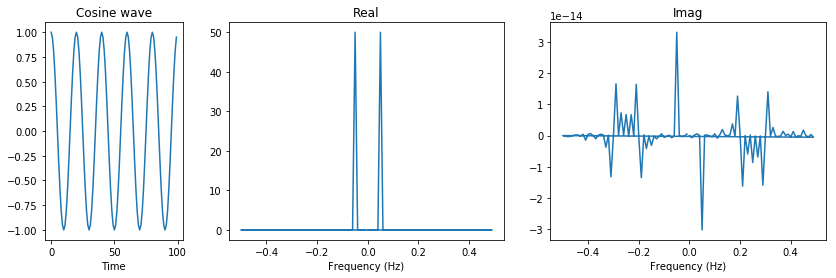

In [4]:
fs=1.0 # sampling rate
f= 0.05 # signal frequency Hz
tmax=100 # t maximum value
phi=0 # phase

N=int(tmax*fs) # number of samples

t=np.linspace(0, tmax, N, endpoint=False) # time (s)
y=np.cos(2*np.pi*f*t+phi) # cosine wave


F = np.fft.fft(y) # FFT
dt=t[1]-t[0]  # time step
fq=np.fft.fftfreq(N,dt)  # frequencies


fig=plt.figure(figsize=(14,4))
gs = gridspec.GridSpec(1,3, width_ratios=[1,2,2]) 
ax1=fig.add_subplot(gs[0])
ax1.plot(t,y) # cosine wave
ax1.set_xlabel('Time') 
ax1.set_title('Cosine wave') 


ax2=fig.add_subplot(gs[1])
ax2.plot(fq,np.real(F)) # only shows up to N/2 samples
ax2.set_title("Real")
ax2.set_xlabel("Frequency (Hz)")

ax3=fig.add_subplot(gs[2])
ax3.plot(fq,np.imag(F)) # only shows up to N/2 samples
ax3.set_title("Imag")
ax3.set_xlabel("Frequency (Hz)")

plt.show()

As can be seen above, the frequency spectra contain negative frequency components (check below as well). Signals are valid only up to N/2 samples. 

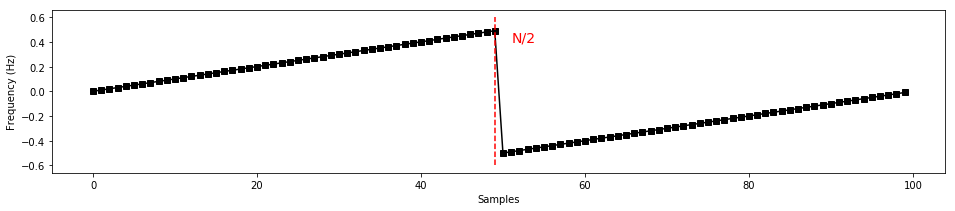

In [19]:
fig=plt.figure(figsize=(16,3))
ax=fig.add_subplot(111)
ax.plot(fq, marker='s', color='black')
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Samples')
ax.plot(np.array([N/2-1,N/2-1]), np.array([-0.6,0.6]), '--',color='red')
ax.text(51,0.4 , 'N/2', fontsize=14, color='red')
plt.show()

## Examples: Checking the real and imaginary part and the phase

### cos(2&pi;f), f=0.05, fs=1.0, N=100

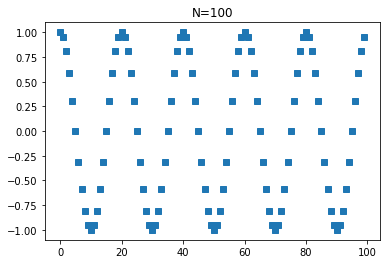

In [20]:
fs=1.0 # sampling rate
f= 0.05 # signal frequency Hz
tmax=100 # t maximum value
phi=0 # phase

N=int(tmax*fs) # number of samples

t=np.linspace(0, tmax, N, endpoint=False) # time (s)
y=np.cos(2*np.pi*f*t+phi)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(t,y, 's')
ax.set_title("N=%d"%N)
plt.show()

In [21]:
F = np.fft.fft(y) # FFT
dt=t[1]-t[0]  # time step
fq=np.fft.fftfreq(N,dt)  # frequencies

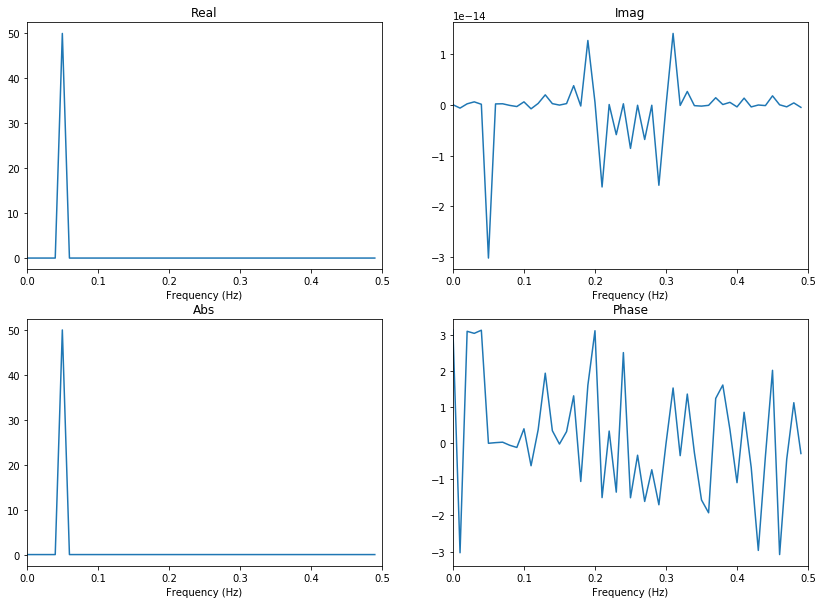

In [22]:
fig=plt.figure(figsize=(14,10))
ax=fig.add_subplot(221)
ax.plot(fq[:int(N/2)],np.real(F[:int(N/2)])) # only shows up to N/2 samples
ax.set_xlim([0,fs/2])
ax.set_title("Real")
ax.set_xlabel("Frequency (Hz)")

ax=fig.add_subplot(222)
ax.plot(fq[:int(N/2)],np.imag(F[:int(N/2)])) # only shows up to N/2 samples
ax.set_xlim([0,fs/2])
ax.set_title("Imag")
ax.set_xlabel("Frequency (Hz)")


ax=fig.add_subplot(223)
ax.plot(fq[:int(N/2)],np.abs(F[:int(N/2)])) # only shows up to N/2 samples
ax.set_xlim([0,fs/2])
ax.set_title("Abs")
ax.set_xlabel("Frequency (Hz)")


ax=fig.add_subplot(224)
ax.plot(fq[:int(N/2)],np.angle(F[:int(N/2)])) # only shows up to N/2 samples
ax.set_xlim([0,fs/2])
ax.set_title("Phase")
ax.set_xlabel("Frequency (Hz)")


plt.show()

In [23]:
idx=find_peaks(np.abs(F), threshold=1)
print("Maximum value: index =",idx[0])
print("Corresponding frequency =",fq[idx[0]])
print("Corresponding phase =",np.angle(F[:int(N/2)])[idx[0][0]])

Maximum value: index = [ 5 95]
Corresponding frequency = [ 0.05 -0.05]
Corresponding phase = -6.026978938704491e-16


- Since only cosine wave is considered, the real part has a large value while the imaginary part is almost zero.
- In the frequency spectrum, a peak is found at 0.05 Hz. This is the frequency of the considered wave.
- At 0.05 Hz, phase is zero, which is also correct. 

### cos(2&pi;f-&pi;/2) = sin(2&pi;f), f=0.05, fs=1.0, N=100

Compared to the previous one, only the phase is changed.

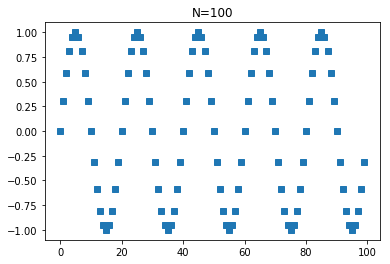

In [24]:
fs=1.0 # sampling rate
f= 0.05 # signal frequency Hz
tmax=100 # t maximum value
phi=-0.5*np.pi # phase

N=int(tmax*fs) # number of samples

t=np.linspace(0, tmax, N, endpoint=False) # time (s)
y=np.cos(2*np.pi*f*t+phi)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(t,y, 's')
ax.set_title("N=%d"%N)
plt.show()

In [25]:
F = np.fft.fft(y) # FFT
dt=t[1]-t[0]  # time step
fq=np.fft.fftfreq(N,dt)  # frequencies

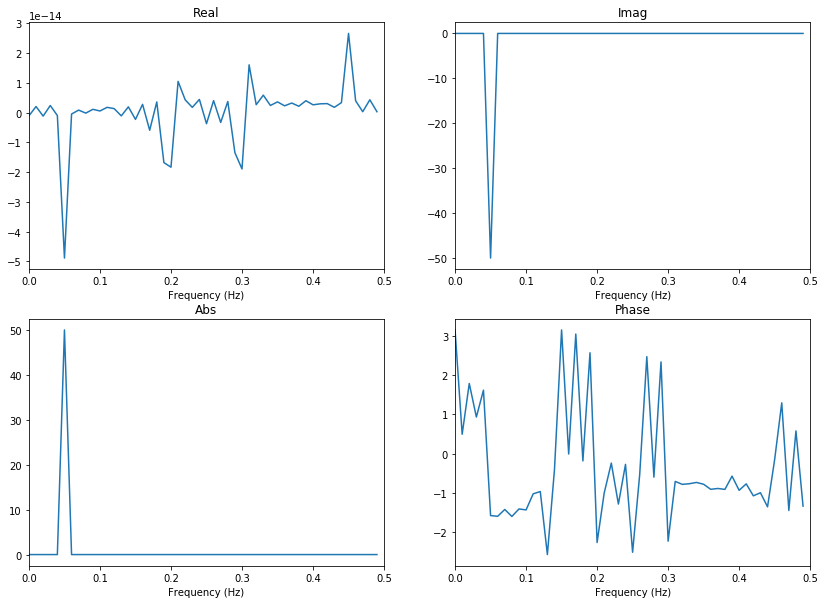

In [26]:
fig=plt.figure(figsize=(14,10))
ax=fig.add_subplot(221)
ax.plot(fq[:int(N/2)],np.real(F[:int(N/2)])) # only shows up to N/2 samples
ax.set_xlim([0,fs/2])
ax.set_title("Real")
ax.set_xlabel("Frequency (Hz)")

ax=fig.add_subplot(222)
ax.plot(fq[:int(N/2)],np.imag(F[:int(N/2)])) # only shows up to N/2 samples
ax.set_xlim([0,fs/2])
ax.set_title("Imag")
ax.set_xlabel("Frequency (Hz)")


ax=fig.add_subplot(223)
ax.plot(fq[:int(N/2)],np.abs(F[:int(N/2)])) # only shows up to N/2 samples
ax.set_xlim([0,fs/2])
ax.set_title("Abs")
ax.set_xlabel("Frequency (Hz)")


ax=fig.add_subplot(224)
ax.plot(fq[:int(N/2)],np.angle(F[:int(N/2)])) # only shows up to N/2 samples
ax.set_xlim([0,fs/2])
ax.set_title("Phase")
ax.set_xlabel("Frequency (Hz)")


plt.show()

In [27]:
idx=find_peaks(np.abs(F), threshold=1)
print("Maximum value: index =",idx[0])
print("Corresponding frequency =",fq[idx[0]])
print("Corresponding phase =",np.angle(F[:int(N/2)])[idx[0][0]])

Maximum value: index = [ 5 95]
Corresponding frequency = [ 0.05 -0.05]
Corresponding phase = -1.5707963267948974


- In the current case, the real part (cosine) is almost zero while the imaginary part (sine) has a larger value.
- In the frequency spectrum, a peak is found at 0.05 Hz. This is the frequency of the considered wave.
- At 0.05 Hz, phase is -&pi;/2, which is also correct. 

## Getting Amplitudes for Synthesis

The synthesis equation for a time-series data x[i] is given by

$$
    x [i] = \sum_{k=0}^{N/2}Re\bar{X}[k]cos(2\pi ki/N)+\sum_{k=0}^{N/2}Im\bar{X}[k]sin(2\pi ki/N)
$$

It should be noted that the amplitudes needed for synthesis are slightly different from the frequency domain of a signal (denoted by ImX[k] and ReX[k]). The amplitudes are given by

$$
    Re\bar{X}[k]=\frac{ReX[k]}{N/2}    
$$ 
and 
$$
    Im\bar{X}[k]=-\frac{ImX[k]}{N/2},
$$

except for two special cases:

$$
    Re\bar{X}[0]=\frac{ReX[0]}{N}    
$$ 
and 
$$
    Re\bar{X}[N/2]=\frac{ReX[N/2]}{N}.
$$

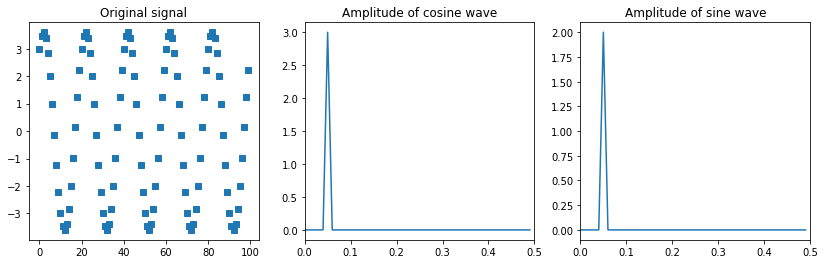

In [29]:
fs=1.0 # sampling rate
f= 0.05 # signal frequency Hz
tmax=100 # t maximum value

N=int(tmax*fs) # number of samples

t=np.linspace(0, tmax, N, endpoint=False) # time (s)
y=3*np.cos(2*np.pi*f*t)+2*np.sin(2*np.pi*f*t) # Amplitude of cosine: 3. Amplitude of sine: 2

F = np.fft.fft(y) # FFT
dt=t[1]-t[0]  # time step
fq=np.fft.fftfreq(N,dt)  # frequencies


real_amp=np.real(F)/(N/2)
imag_amp=-np.imag(F)/(N/2)

real_amp[0]=real_amp[0]/2
real_amp[int(N/2)]=real_amp[int(N/2)]/2



fig=plt.figure(figsize=(14,4))
ax1=fig.add_subplot(131)
ax1.plot(t,y, 's')
ax1.set_title("Original signal")

ax2=fig.add_subplot(132)
ax2.plot(fq[:int(N/2)],real_amp[:int(N/2)]) # only shows up to N/2 samples
ax2.set_xlim([0,fs/2])
ax2.set_title("Amplitude of cosine wave")


ax3=fig.add_subplot(133)
ax3.plot(fq[:int(N/2)],imag_amp[:int(N/2)]) # only shows up to N/2 samples
ax3.set_xlim([0,fs/2])
ax3.set_title("Amplitude of sine wave")


plt.show()

As you can see, the amplitudes of the cosine and sine waves are correctly extracted.

## Resolution

### Number of periods

By increasing the length of the signal, resolution is improved.

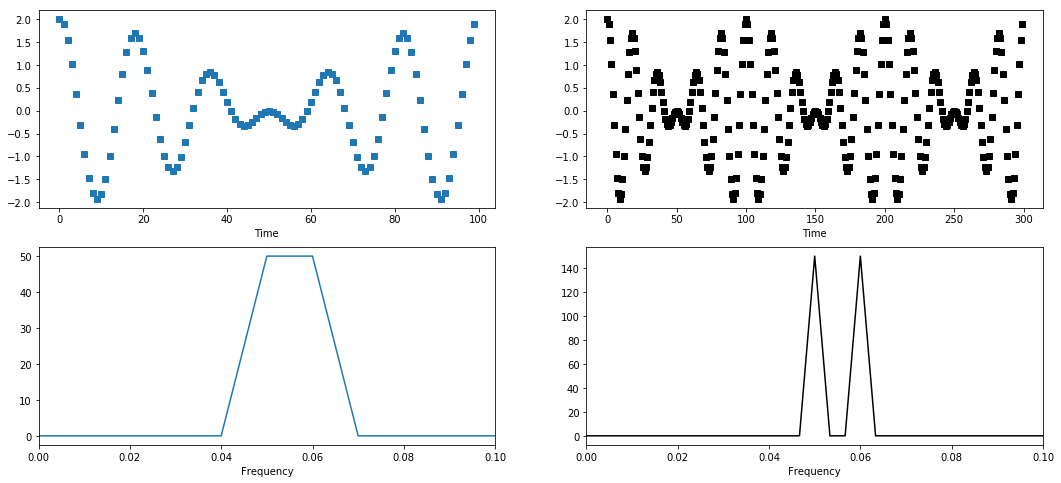

In [30]:
fs=1.0 # sampling rate
f= 0.05 # signal frequency Hz
tmax=100 # t maximum value
N=int(tmax*fs) # number of samples
t=np.linspace(0, tmax, N, endpoint=False) # time (s)
y=np.cos(2*np.pi*f*t)+np.cos(2*np.pi*(0.01+f)*t) 
F = np.fft.fft(y) # FFT
dt=t[1]-t[0]  # time step
fq=np.fft.fftfreq(N,dt)  # frequencies


fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(221)
ax1.plot(t,y, 's')
ax1.set_xlabel('Time')


ax2=fig.add_subplot(223)
ax2.plot(fq[:int(N/2)],np.abs(F[:int(N/2)])) # only shows up to N/2 samples
ax2.set_xlim([0,0.1])
ax2.set_xlabel('Frequency')


tmax=300 # t maximum value
N=int(tmax*fs) # number of samples
t=np.linspace(0, tmax, N, endpoint=False) # time (s)
y=np.cos(2*np.pi*f*t)+np.cos(2*np.pi*(0.01+f)*t) 
F = np.fft.fft(y) # FFT
dt=t[1]-t[0]  # time step
fq=np.fft.fftfreq(N,dt)  # frequencies

ax3=fig.add_subplot(222)
ax3.plot(t,y,'s', color='black') 
ax3.set_xlabel('Time')


ax4=fig.add_subplot(224)
ax4.plot(fq[:int(N/2)],np.abs(F[:int(N/2)]), color='black') # only shows up to N/2 samples
ax4.set_xlim([0,0.1])
ax4.set_xlabel('Frequency')

plt.show()

The unresolved peaks (lower left) are clearly visible in the lower right panel.

### Hamming window

Sometimes, an input signal contains a sinusoid with a frequency between two of the basis functions. In this case, a frequency spectrum contains a peak with tails because that sinusoid component cannot be represented by a single basis function. This feature is clearly visible in the figure below (lower left).

You can avoid this problem simply by multiplying the signal by a <strong>Hamming window</strong> before taking the DFT. The Hamming window is given by

$$
    w = 0.54 - 0.46cos(2 \pi i/M)
$$

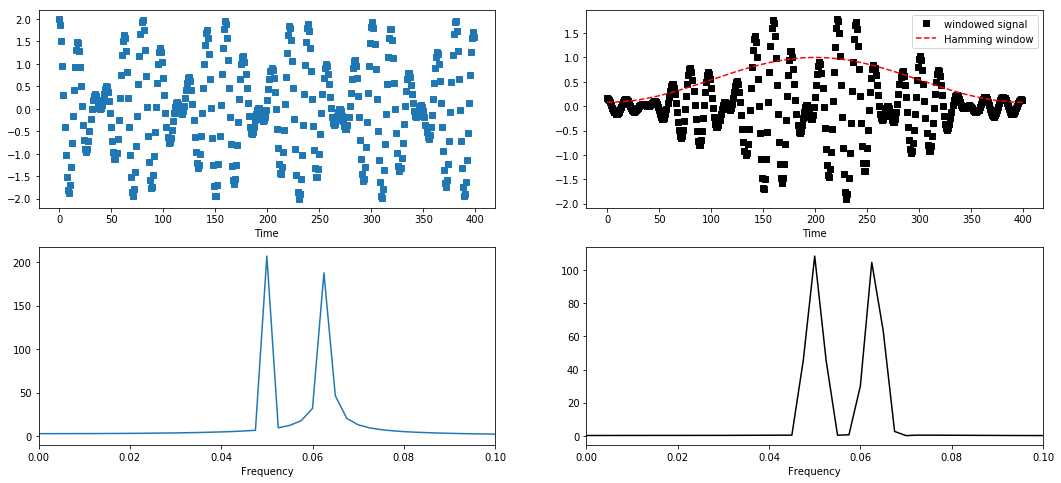

In [65]:
fs=1.0 # sampling rate
f= 0.05 # signal frequency Hz
tmax=400 # t maximum value
N=int(tmax*fs) # number of samples
t=np.linspace(0, tmax, N, endpoint=False) # time (s)
y=np.cos(2*np.pi*f*t)+np.cos(2*np.pi*(0.013+f)*t) 
F = np.fft.fft(y) # FFT
dt=t[1]-t[0]  # time step
fq=np.fft.fftfreq(N,dt)  # frequencies


fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(221)
ax1.plot(t,y, 's')
ax1.set_xlabel('Time')


ax2=fig.add_subplot(223)
ax2.plot(fq[:int(N/2)],np.abs(F[:int(N/2)])) # only shows up to N/2 samples
ax2.set_xlim([0,0.1])
ax2.set_xlabel('Frequency')



w_hamming = 0.54-0.46*np.cos(2*np.pi*t/N) # Hamming window

yw=y*w_hamming
F = np.fft.fft(yw) # FFT
dt=t[1]-t[0]  # time step
fq=np.fft.fftfreq(N,dt)  # frequencies



ax3=fig.add_subplot(222)
ax3.plot(t,yw,'s', color='black') 
ax3.plot(t,w_hamming, '--', color='red')
ax3.set_xlabel('Time')
ax3.legend(['windowed signal', 'Hamming window'])

ax4=fig.add_subplot(224)
ax4.plot(fq[:int(N/2)],np.abs(F[:int(N/2)]), color='black') # only shows up to N/2 samples
ax4.set_xlim([0,0.1])
ax4.set_xlabel('Frequency')

plt.show()

With the Hamming window, the peaks in the frequency spectrum look more alike as can be seen in the above figure (lower right). The tails are also reduced. However, the resolution in the spectrum becomes worse. It is important to mention that windows provide a trade-off between resolution (the width of the peak) and spectral leakage (the amplitude of the tails).

The windowing procedure done here is just multiplication of the input signal and window function. Multiplication in the time domain corresponds to convolution in the frequency domain. 

### Padding an input signal with zeros

By padding a signal with zeros before taking the DFT, it is possible to get higer resolution. You can add an infinite number of zeros to the time domain signal. In theory, it is possible to change a discrete aperiodic signal in the time domain into a frequency domain that is a continuous curve through discrete time Fourier transform (DTFT).

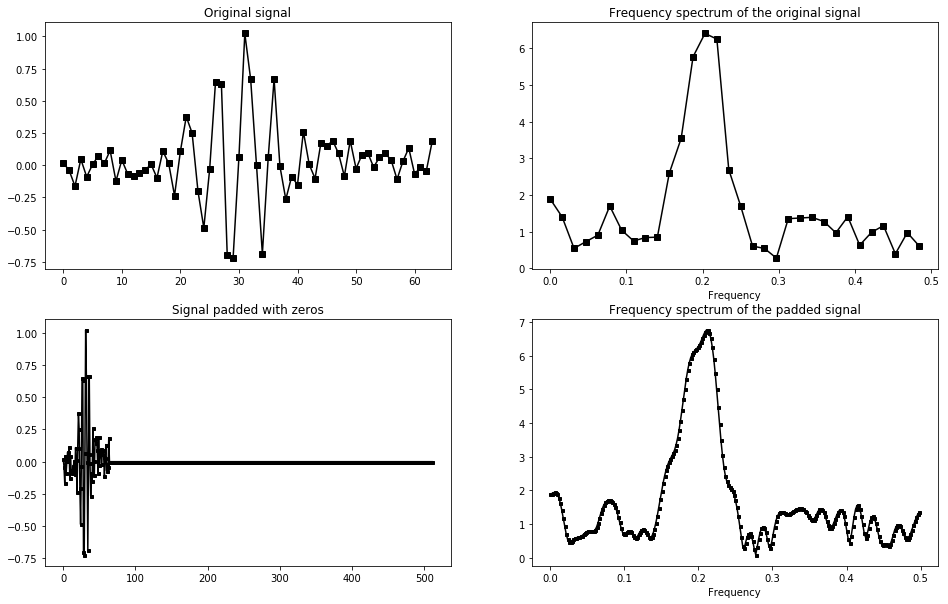

In [134]:
N=64

np.random.seed(0)
f=0.2*np.random.normal(loc=1,scale=0.005,size=N)
t=np.linspace(0,63,N)
width=7
y=np.sin(2*np.pi*f*t)*np.exp( -(t-30)**2/width**2 ) +np.random.normal(loc=0,scale=0.1,size=N)


# Original signal 
fig=plt.figure(figsize=(16,10))
ax1=fig.add_subplot(221)
ax1.plot(t,y, marker='s', color='black')
ax1.set_title('Original signal')

F = np.fft.fft(y) # FFT
dt=t[1]-t[0]  # time step
fq=np.fft.fftfreq(N,dt)  # frequencies

# FFT result
ax2=fig.add_subplot(222)
ax2.plot(fq[:int(N/2)],np.abs(F)[:int(N/2)], marker='s', color='black')
ax2.set_title('Frequency spectrum of the original signal')
ax2.set_xlabel('Frequency')



# Padding with zeros
y_padded=np.append(y,np.zeros(448))
N=y_padded.shape[0] #512
ax3=fig.add_subplot(223)
ax3.plot(y_padded, marker='s', color='black', markersize=3)
ax3.set_title('Signal padded with zeros')



F = np.fft.fft(y_padded) # FFT
dt=t[1]-t[0]  # time step
fq=np.fft.fftfreq(N,dt)  # frequencies

# FFT result
ax4=fig.add_subplot(224)
ax4.plot(fq[:int(N/2)],np.abs(F)[:int(N/2)], marker='s', color='black', markersize=3)
ax4.set_title('Frequency spectrum of the padded signal')
ax4.set_xlabel('Frequency')


plt.show()

## Convolution in time domain and multiplication in frequency domain

As mentioned above, the convolution in the time domain is equivalent to the multiplication in the frequency domain. 

$$
    x[i] * h[i]=y[i]  
$$
  
$$
    X[f]H[f]=Y[f]
$$

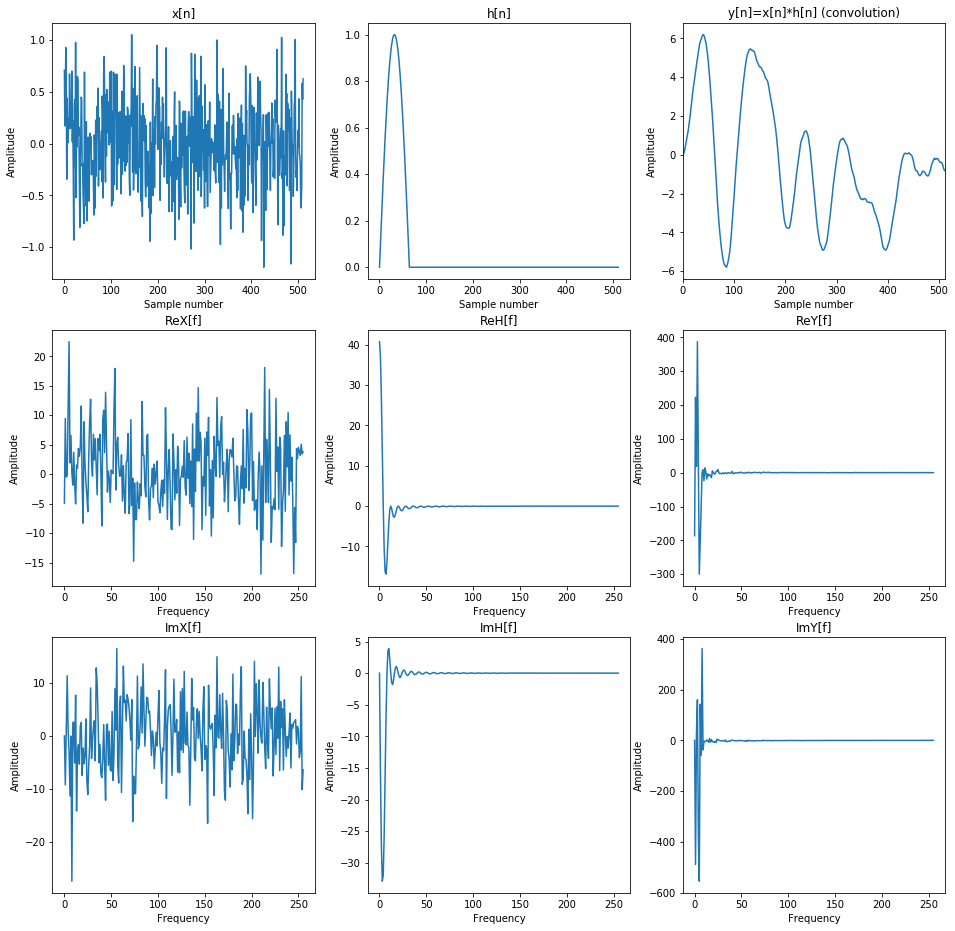

In [235]:
N= 512

t=np.linspace(0,N-1,N)
np.random.seed(0)
x=0.1*np.sin(t/10)+np.random.normal(loc=0,scale=0.4,size=N) # input signal

h=np.zeros(N)
h[:64]=h[:64]+np.sin(t[:64]/64*np.pi) # impulse response

y= np.convolve(x,h) # convolution of x and h. shape = (1023,)

X = np.fft.fft(x)
H = np.fft.fft(h) 
Y = np.fft.fft(y[:N]) # only up to N

fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(331)
ax1.plot(x)
ax1.set(xlabel='Sample number', ylabel='Amplitude', title='x[n]')

ax2 = fig.add_subplot(332)
ax2.plot(h)
ax2.set(xlabel='Sample number', ylabel='Amplitude', title='h[n]')


ax3 = fig.add_subplot(333)
ax3.plot(y)
ax3.set_xlim([0,N])
ax3.set(xlabel='Sample number', ylabel='Amplitude', title='y[n]=x[n]*h[n] (convolution)')


ax4 = fig.add_subplot(334)
ax4.plot(np.real(X[:int(N/2)]))
ax4.set(xlabel='Frequency', ylabel='Amplitude', title='ReX[f]')


ax5 = fig.add_subplot(335)
ax5.plot(np.real(H[:int(N/2)]))
ax5.set(xlabel='Frequency', ylabel='Amplitude', title='ReH[f]')


ax6 = fig.add_subplot(336)
ax6.plot(np.real(Y[:int(N/2)]))
ax6.set(xlabel='Frequency', ylabel='Amplitude', title='ReY[f]')


ax7 = fig.add_subplot(337)
ax7.plot(np.imag(X[:int(N/2)]))
ax7.set(xlabel='Frequency', ylabel='Amplitude', title='ImX[f]')


ax8 = fig.add_subplot(338)
ax8.plot(np.imag(H[:int(N/2)]))
ax8.set(xlabel='Frequency', ylabel='Amplitude', title='ImH[f]')


ax9 = fig.add_subplot(339)
ax9.plot(np.imag(Y[:int(N/2)]))
ax9.set(xlabel='Frequency', ylabel='Amplitude', title='ImY[f]')


plt.show()

Let us check the relation between convolution in the time domain and multiplication in the frequency domain. In the next cell, the frequency domain signal Y[f] is obtained by:
- DFT of the time-series signal y[i] (red curve)
- Multiplication of frequency-domain signals, X[f] and H[f] (black curve)  
  
Results are shown below.

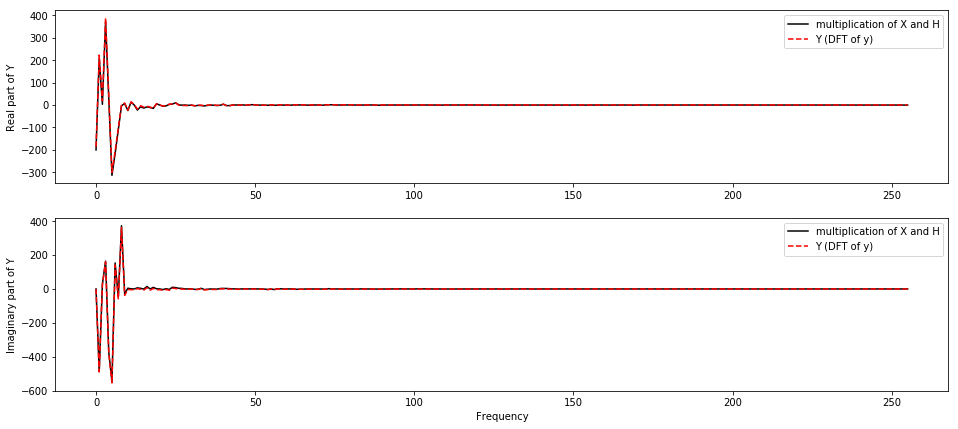

In [241]:
fig=plt.figure(figsize=(16,7))
ax1=fig.add_subplot(211)
ax1.plot(np.real(X*H)[:int(N/2)], color='black')
ax1.plot(np.real(Y)[:int(N/2)], '--', color='red')
ax1.legend(['multiplication of X and H','Y (DFT of y)'])
ax1.set_ylabel('Real part of Y')

ax2=fig.add_subplot(212)
ax2.plot(np.imag(X*H)[:int(N/2)], color='black')
ax2.plot(np.imag(Y)[:int(N/2)], '--', color='red')
ax2.legend(['multiplication of X and H','Y (DFT of y)'])
ax2.set_ylabel('Imaginary part of Y')
ax2.set_xlabel('Frequency')


plt.show()

The red and black curves coincide each other. 